# Active Kriging-Monte Carlo Simulation Example 2

Author: Katiana Kontolati \
Date: May 25, 2020

In this example, Monte Carlo Sampling is used to generate samples from Uniform distribution and new samples are generated adaptively, using EIF (Expected Improvement Function) as the learning criteria.

## Branin-Hoo function

### Decription:

>  - Dimensions: 2
>  - This function is usually evaluated on the square $x_1 \in [-5, 10], \ x_2 \in [0, 15]$
>  - The function has two local minima and one global minimum
>  - Reference: Forrester, A., Sobester, A., & Keane, A. (2008). Engineering design via surrogate modelling: a practical guide. Wiley.

> $\displaystyle f(x) = a(x_2-bx_1^2 + cx_1 -r)^2 + s(1-t)\cos(x_1) + s + 5x_1$
> <br>
> <br>
> where the recommended values of a, b, c, r, s and t are: $a = 1,\ b = 5.1/(4\pi^2),\ c = 5/\pi, \ r = 6, \ s = 10, \ t = 1/(8\pi)$

<img src="branin.png" alt="branin.png" height="350" width="400" align=left>

Import the necessary libraries. Here we import standard libraries such as numpy, matplotlib and other necessary library for plots, but also need to import the MCS, AKMCS, Kriging and RunModel class from UQpy.

In [1]:
%pylab inline
from UQpy.surrogates import Kriging
from UQpy.sampling import MonteCarloSampling, AdaptiveKriging
from UQpy.RunModel import RunModel
from UQpy.distributions import Uniform
from BraninHoo import function
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import time
from UQpy.optimization.MinimizeOptimizer import MinimizeOptimizer

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:396: BeartypeDecorHintPepDeprecatedWarning: Type hint typing.Callable deprecated by PEP 585. To resolve this, globally replace this hint by the equivalent PEP 585 type hint (e.g., "typing.List[int]" by "list[int]"). See also:
    https://www.python.org/dev/peps/pep-0585
  warn(warning_message, BeartypeDecorHintPepDeprecatedWarning)
/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:396: BeartypeDecorHintPepDeprecatedWarning: Type hint typing.Callable deprecated by PEP 585. To resolve this, globally replace this hint by the equivalent PEP 585 type hint (e.g., "typing.List[int]" by "list[int]"). See also:
    https://www.python.org/dev/peps/pep-0585
  warn(warning_message, BeartypeDecorHintPepDeprecatedWarning)
The selected optimizer method does not support bounds and thus will be ignored.
The selected optimizer method does not support bounds and thus

Using UQpy MCS class to generate samples for two random variables, which are uniformly distributed

In [2]:
marginals = [Uniform(loc=-5, scale=15), Uniform(loc=0, scale=15)]
x = MonteCarloSampling(distributions=marginals, nsamples=20)

RunModel class is used to define an object to evaluate the model at sample points.

In [3]:
rmodel = RunModel(model_script='BraninHoo.py', vec=False)

Krig class defines an object to generate an surrogate model for a given set of data.

In [4]:
from UQpy.surrogates.kriging.regression_models import Linear
from UQpy.surrogates.kriging.correlation_models import Exponential
optimizer = MinimizeOptimizer(method="L-BFGS-B")
K = Kriging(regression_model=Linear(), correlation_model=Exponential(),optimizer=optimizer,
            correlation_model_parameters=[1, 1], optimizations_number=10)

Choose an appropriate learning function.

In [5]:
from UQpy.sampling.adaptive_kriging_functions.ExpectedImprovement import ExpectedImprovement

AKMCS class is used to generate new sample using 'U-function' as active learning function.

In [6]:
start_time = time.time()
learning_function= ExpectedImprovement()
a = AdaptiveKriging(runmodel_object=rmodel, samples=x.samples, surrogate=K,
                    learning_nsamples=10 ** 3, n_add=1,
                    learning_function=learning_function, distributions=marginals)
a.run(nsamples=50)
elapsed_time = time.time() - start_time

/Users/dimitris/PycharmProjects/dimtsap/UQpy/src/UQpy/optimization/MinimizeOptimizer.py:24: OptimizeWarning: Unknown solver options: catol
  return minimize(function, initial_guess, args=args,


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19594D+01    |proj g|=  9.99000D-01

At iterate    1    f=  1.13834D+01    |proj g|=  6.49754D-01

At iterate    2    f=  1.12505D+01    |proj g|=  6.38493D-01

At iterate    3    f=  1.12135D+01    |proj g|=  2.06258D-01

At iterate    4    f=  1.12033D+01    |proj g|=  7.71887D-02

At iterate    5    f=  1.12030D+01    |proj g|=  2.72530D-03

At iterate    6    f=  1.12030D+01    |proj g|=  2.19196D-04
True

At iterate    7    f=  1.12030D+01    |proj g|=  1.16776D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final func


At iterate    4    f=  6.76468D+00    |proj g|=  2.06091D-03

At iterate    5    f=  6.76468D+00    |proj g|=  2.38234D-05
True

At iterate    6    f=  6.76468D+00    |proj g|=  1.62045D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6      8      6     0     0   1.620D-07   6.765D+00
  F =   6.7646803719709183     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.71736D+00    |proj g|=  2.77098D-01

At

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.24892D+00    |proj g|=  2.22131D-01

At iterate    1    f= -3.25165D+00    |proj g|=  9.63155D-02

At iterate    2    f= -3.25171D+00    |proj g|=  5.40169D-02

At iterate    3    f= -3.25177D+00    |proj g|=  3.84185D-02

At iterate    4    f= -3.25181D+00    |proj g|=  2.04902D-02

At iterate    5    f= -3.25181D+00    |proj g|=  1.22874D-04
True

At iterate    6    f= -3.25181D+00    |proj g|=  1.03501D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.49253D+01    |proj g|=  1.80891D-01

At iterate    1    f= -1.49263D+01    |proj g|=  1.63033D-01

At iterate    2    f= -1.49264D+01    |proj g|=  1.26744D-01

At iterate    3    f= -1.49267D+01    |proj g|=  1.97362D-02

At iterate    4    f= -1.49267D+01    |proj g|=  3.98079D-05
True

At iterate    5    f= -1.49267D+01    |proj g|=  8.18093D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      6     0    

Visualize initial and new samples on top of the Branin-Hoo surface.

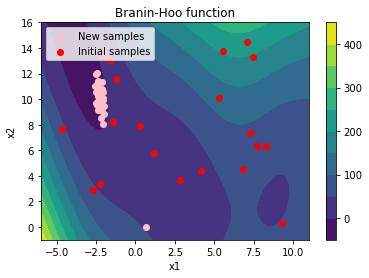

In [7]:
num = 200
xlist = np.linspace(-6, 11, num)
ylist = np.linspace(-1, 16, num)
X, Y = np.meshgrid(xlist, ylist)

Z = np.zeros((num, num))
for i in range(num):
    for j in range(num):
        tem = np.array([[X[i, j], Y[i, j]]])
        Z[i, j] = function(tem)

fig, ax = plt.subplots(1, 1)
cp = ax.contourf(X, Y, Z, 10)
xlabel('x1')
ylabel('x2')
fig.colorbar(cp)
nd = x.nsamples
scatter(a.samples[nd:, 0], a.samples[nd:, 1], color='pink', label='New samples')
scatter(x.samples[:nd, 0], x.samples[:nd, 1], color='Red', label='Initial samples')
title('Branin-Hoo function');
legend()